# Progetto di Analisi dei Dati: Evoluzione dell'alimentazione e gli impatti sulla salute e la produzione agricola in Italia

## Autore
Natan Sacilotto – 192131

## Obiettivo del progetto
Analizzare come le abitudini alimentari siano cambiate nel corso dei decenni

## Domande guida
1. Come sono cambiate le abitudini alimentari (grassi, zuccheri, proteine, verdure) e il consumo calorico per persona?
2. Come questi cambiamenti si collegano all'andamento dell'indice di obesità e sovreppeso?
3. Quali sono gli effetti dell'uso del suolo?
4. Com'è l'andamento delle emissioni di C02 causate dalla filiera alimentare?

---

## Dataset utilizzati

| Nome dataset | Fonte | URL/Note |
|--------------|-------|----------|
| Consumo alimentare mondiale | OECD | https://www.oecd.org |
| Uso del suolo | FAOSTAT | https://www.fao.org/faostat |
| Dati sanitari (obesità) | OECD | https://www.oecd.org |
| Emissioni C02 | FAOSTAT | https://www.fao.org/faostat/ |

---

# Consumo Calorico e dei Macronutrienti (Italia, 1961–2022)

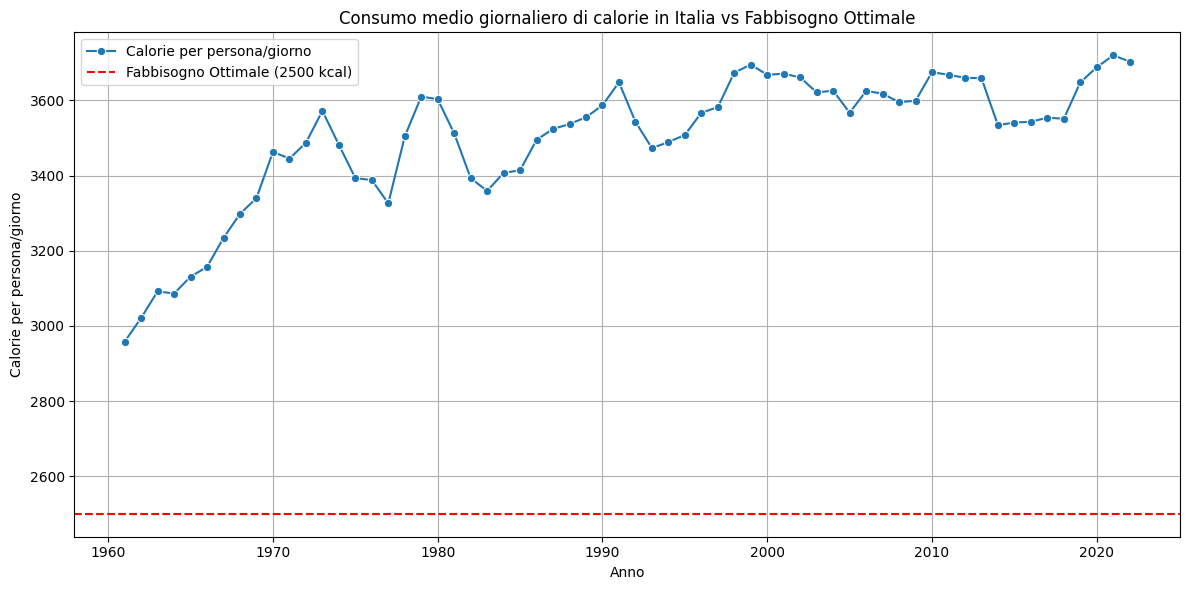

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_calorie = pd.read_csv("Datasets/calorie_per_persona.csv")  # carico il dataset

# Pulizia delle colonne
df_calorie = df_calorie[['TIME_PERIOD', 'OBS_VALUE']].copy()  #crea una copia con solo le colonne utili
df_calorie.dropna(inplace=True)  #rimuove righe con valori nulli

# Ordinamento per data
df_calorie.sort_values('TIME_PERIOD', inplace=True)

# Rinomino le colonne per chiarezza
df_calorie.rename(columns={'TIME_PERIOD': 'Anno', 'OBS_VALUE': 'Calorie'}, inplace=True)

# Aggiungo colonna con lo scostamento percentuale rispetto al fabbisogno medio
fabbisogno_ottimale = 2500
df_calorie['Scostamento_%'] = ((df_calorie['Calorie'] - fabbisogno_ottimale) / fabbisogno_ottimale) * 100

# Grafico
plt.figure(figsize=(12, 6))

# Linea delle calorie osservate
sns.lineplot(data=df_calorie, x='Anno', y='Calorie', label='Calorie per persona/giorno', marker='o')

# Linea del fabbisogno ottimale
plt.axhline(y=fabbisogno_ottimale, color='red', linestyle='--', label='Fabbisogno Ottimale (2500 kcal)')

plt.title('Consumo medio giornaliero di calorie in Italia vs Fabbisogno Ottimale')
plt.xlabel('Anno')
plt.ylabel('Calorie per persona/giorno')
plt.legend()
plt.grid(True)
plt.tight_layout()  #serve a sistemare automaticamente la spaziatura tra elementi del grafico
plt.show()

# Analisi descrittiva

### Consumo calorico giornaliero pro capite

Negli anni '70 l’Italia ha attraversato un periodo di importanti **trasformazioni economiche e sociali**:
- **Boom economico post-bellico (fine anni '50 - inizio '70)**: aumento del reddito, urbanizzazione e diffusione della grande distribuzione.
- **Transizione nutrizionale**: passaggio da una dieta povera (prevalentemente vegetale) a una dieta più ricca di grassi, zuccheri e proteine animali.
- **Accesso più facile agli alimenti industriali** grazie alla modernizzazione agricola e alla crescita del settore alimentare.

Fonti: www.istitutostorico.com, www.treccani.it

---

In [13]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Caricamento e pulizia dati
datasets = {
    'Grassi': pd.read_csv("Datasets/grassi_per_persona_grammi.csv"),
    'Proteine': pd.read_csv("Datasets/proteine_per_persona_grammi.csv"),
    'Zuccheri': pd.read_csv("Datasets/zucchero_per_persona_grammi.csv"),
    'Verdure': pd.read_csv("Datasets/verdura_per_persona_grammi.csv")
}

for key, df in datasets.items():
    df = df[['TIME_PERIOD', 'OBS_VALUE']].dropna()
    df['TIME_PERIOD'] = df['TIME_PERIOD'].astype(int)
    df['OBS_VALUE'] = df['OBS_VALUE'].astype(float)
    df.sort_values('TIME_PERIOD', inplace=True)
    df.rename(columns={'TIME_PERIOD': 'Anno', 'OBS_VALUE': 'Grammi'}, inplace=True)
    datasets[key] = df

# Fabbisogni predefiniti in grammi
fabbisogni = {
    'Grassi': 83,
    'Proteine': 94,
    'Zuccheri': 50,
    'Verdure': 400
}

# Widget di selezione
nutriente_selector = widgets.Dropdown(
    options = list(datasets.keys()),
    value = 'Grassi',
    description = 'Nutriente:'
)



# Funzione aggiornata
def aggiorna_grafico(nutriente):
    clear_output(wait=True)

    df = datasets[nutriente].copy()
    fabbisogno = fabbisogni[nutriente]

    df['Scostamento_%'] = ((df['Grammi'] - fabbisogno) / fabbisogno) * 100

    # Grafico
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Anno', y='Grammi', label=f'{nutriente} consumati', marker='o')
    plt.axhline(y=fabbisogno, color='red', linestyle='--', label=f'Fabbisogno ({fabbisogno}g/giorno)')
    plt.title(f'Consumo di {nutriente.lower()} vs Fabbisogno Giornaliero (dieta da 2500 kcal)')
    plt.xlabel('Anno')
    plt.ylabel('Grammi al giorno')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Collegamento dei widget
widgets.interact(aggiorna_grafico, nutriente=nutriente_selector)

interactive(children=(Dropdown(description='Nutriente:', options=('Grassi', 'Proteine', 'Zuccheri', 'Verdure')…

<function __main__.aggiorna_grafico(nutriente)>

#### Osservazioni:

- L’aumento di **calorie, zuccheri e grassi** coincide con il passaggio da un'alimentazione di sussistenza a una **dieta abbondante ma sbilanciata**, tipica delle società industrializzate.
- Il **calo del consumo di verdure** potrebbe derivare anche da:
  - una maggiore diffusione del consumo di **junk food** e alimenti raffinati
  - una minore propensione alla preparazione di cibi freschi
- L’aumento delle **proteine** può essere collegato:
  - allo sviluppo della zootecnia intensiva
  - al cambiamento culturale che ha reso carne e derivati una presenza quotidiana a tavola

---

# Andamento della popolazione obesa e sovrappeso in Italia (1993-2023)

Nel grafico qui sotto è rappresentato l'andamento percentuale della popolazione italiana classificata come **obesa** e **sovrappeso**.

In [14]:
df_obesity = pd.read_csv("Datasets/OECDO_bese_overweight_MF.csv")  # carico il dataset

# Per fare pulizia estraggo solo le colonne utili
df_clean = df_obesity[['MEASURE', 'SEX', 'TIME_PERIOD', 'OBS_VALUE']].copy()  #.copy() crea una copia indipendente, sicura da modificare
df_clean.dropna(inplace=True)

# Ho creato un dizionario per tradurre i codici grezzi in etichette leggibili
label_misura = {
    'SP_OBS': 'Obesità',
    'SP_OVRGHT': 'Sovrappeso'
}
label_sesso = {
    'F': 'Femminile',
    'M': 'Maschile',
    '_T': 'Totale'
}

# Widget per la scelta
tipo_selector = widgets.Dropdown(
    options=[('Obesità', 'SP_OBS'), ('Sovrappeso', 'SP_OVRGHT')],  #utilizza 2 tuple, l’utente vede solo "Obesità" e "Sovrappeso" ma quando seleziona, il widget restituisce il valore associato: "SP_OBS" o "SP_OVRGHT"
    value='SP_OBS',
    description='Categoria:'
)

# Funzione interattiva
def aggiorna_grafico(tipo_misura):
    clear_output(wait=True)  # cancella il grafico vecchio

    df = df_obesity[df_obesity['MEASURE'] == tipo_misura]  #maschera booleana

    plt.figure(figsize=(12, 6))
    for sesso in ['F', 'M', '_T']:
        sotto = df[df['SEX'] == sesso]
        sns.lineplot(data=sotto, x='TIME_PERIOD', y='OBS_VALUE', label=label_sesso[sesso], marker='o')

    plt.title(f"Andamento percentuale persone con {label_misura[tipo_misura]} in Italia")
    plt.xlabel("Anno")
    plt.ylabel("Percentuale della popolazione (%)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Attiva la GUI
widgets.interact(aggiorna_grafico, tipo_misura=tipo_selector)


interactive(children=(Dropdown(description='Categoria:', options=(('Obesità', 'SP_OBS'), ('Sovrappeso', 'SP_OV…

<function __main__.aggiorna_grafico(tipo_misura)>

## Osservazioni chiave

- L’aumento è continuo e significativo in tutte le fasce di popolazione.
- Non si notano veri periodi di regressione stabile: anche negli anni in cui si è registrato un lieve calo, il trend di lungo periodo è rimasto in crescita.
- Nel tempo, il divario tra maschi e femmine si è ampliato, con i maschi che risultano nettamente più colpiti dall'obesità.

## Possibili cause

- Cambiamenti nelle abitudini alimentari (aumento del consumo di zuccheri, grassi e cibi processati, come evidenziato anche dai grafici precedenti);
- Riduzione dell’attività fisica nella vita quotidiana;
- Invecchiamento della popolazione, che incide sui livelli medi di obesità;
- Fattori socio-economici (es. urbanizzazione, lavoro sedentario, ecc.).

---

# Evoluzione dell'uso del suolo (Italia, 1961–2023)

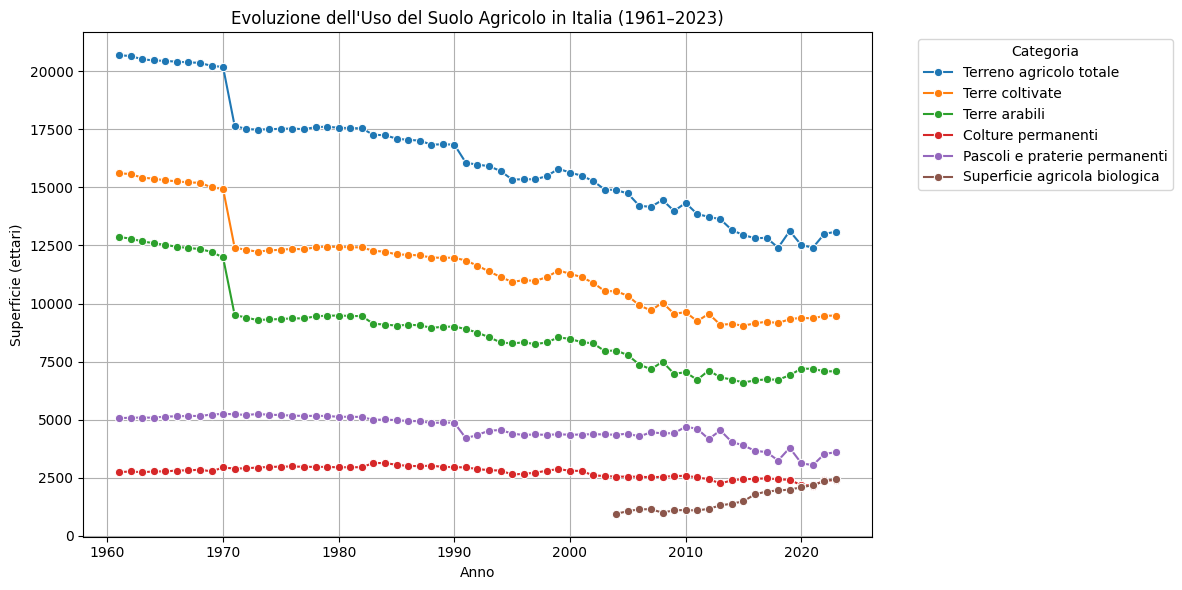

In [17]:
df_land = pd.read_csv("Datasets/FAOSTAT_data_land_use.csv")

categorie_da_tenere = [
    'Agricultural land',
    'Cropland',
    'Arable land',
    'Permanent crops',
    'Permanent meadows and pastures',
    'Agriculture area under organic agric.'
]

# Traduco i nomi delle categorie in italiano
traduzioni = {
    'Agricultural land': 'Terreno agricolo totale',
    'Cropland': 'Terre coltivate',
    'Arable land': 'Terre arabili',
    'Permanent crops': 'Colture permanenti',
    'Permanent meadows and pastures': 'Pascoli e praterie permanenti',
    'Agriculture area under organic agric.': 'Superficie agricola biologica'
}

#isin è molto utile perché controlla per ogni riga se il valore item è contenuto 
#nella lista categorie_da_tenere e restituisce una serie booleana true o false
df_land = df_land[df_land['Item'].isin(categorie_da_tenere)]  #in questa riga di codice, ho creato una maschera booleana utilizzando la funzione isin
df_land = df_land[['Year', 'Item', 'Value']].rename(columns={
    'Year': 'Anno',
    'Item': 'Categoria',
    'Value': 'Superficie_ha'
})

df_land['Categoria'] = df_land['Categoria'].map(traduzioni)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_land, x='Anno', y='Superficie_ha', hue='Categoria', marker='o')

plt.title("Evoluzione dell'Uso del Suolo Agricolo in Italia (1961–2023)")
plt.xlabel("Anno")
plt.ylabel("Superficie (ettari)")
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Tendenze generali

Nel corso degli ultimi 60 anni si osserva una **riduzione significativa delle superfici agricole complessive**, con un calo marcato sia delle terre coltivate (cropland e arable land), sia delle superfici dedicate ai pascoli e alle colture. Questo ha condotto ad un **progressivo abbandono delle pratiche agricole tradizionali**, dovuto a fattori economici, sociali e politici, come:
- urbanizzazione crescente e consumo di suolo,
- meccanizzazione e concentrazione delle aziende agricole,
- cambiamenti nelle politiche agricole europee,
- trasformazioni nei consumi e nelle filiere alimentari.

### Segnali positivi

A partire dagli anni 2000, si nota una **crescita costante dell’agricoltura biologica**, che rappresenta una delle poche componenti in espansione. Questo indica un **rinnovato interesse verso modelli produttivi più sostenibili** e attenti all’ambiente.

---

# Evoluzione delle emimissioni di CO2 (1990–2023)

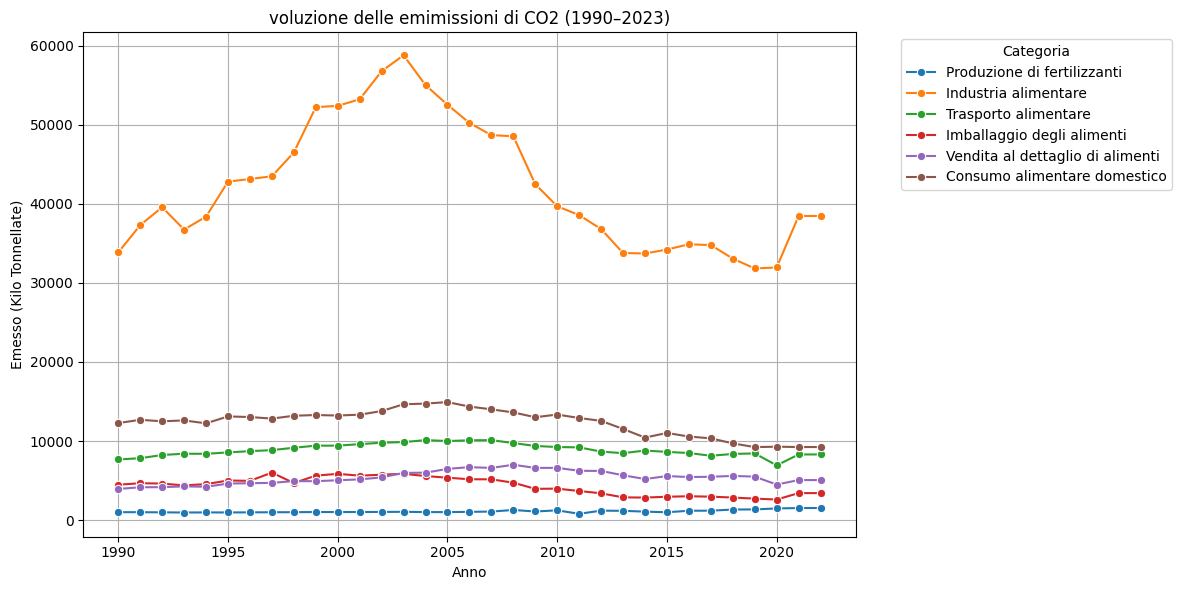

In [18]:
df_emissioni = pd.read_csv("Datasets/FAOSTAT_data_emissioni_CO2.csv")  # carico il dataset

categorie_da_tenere = [
    'Fertilizers Manufacturing',
    'Food Processing',
    'Food Transport',
    'Food Packaging',
    'Food Retail',
    'Food Household Consumption'
]
# Traduzione delle categorie in italiano
traduzioni = {
    'Fertilizers Manufacturing': 'Produzione di fertilizzanti',
    'Food Processing': 'Industria alimentare',
    'Food Transport': 'Trasporto alimentare',
    'Food Packaging': 'Imballaggio degli alimenti',
    'Food Retail': 'Vendita al dettaglio di alimenti',
    'Food Household Consumption': 'Consumo alimentare domestico'
}

df_emissioni = df_emissioni[['Year', 'Item', 'Value']].rename(columns={
    'Year': 'Anno',
    'Item': 'Categoria',
    'Value': 'Emesso'
})

df_emissioni['Categoria'] = df_emissioni['Categoria'].map(traduzioni)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_emissioni, x='Anno', y='Emesso', hue='Categoria', marker='o')

plt.title("voluzione delle emimissioni di CO2 (1990–2023)")
plt.xlabel("Anno")
plt.ylabel("Emesso (Kilo Tonnellate)")
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Tendenze generali

- Dal 2005 in poi si nota una **tendenza al calo delle emissioni** in quasi tutte le categorie, coerente con le politiche ambientali europee (come il Protocollo di Kyoto e l’Agenda 2030) e l’introduzione di tecnologie più sostenibili.

- Il **rimbalzo del 2022–2023** in alcune categorie potrebbe essere collegato alla ripresa post-pandemia o ad effetti secondari delle crisi energetiche globali.

---

# Conclusioni Finali

Questo progetto ha analizzato in profondità i cambiamenti nelle abitudini alimentari italiane dal 1961 a oggi, mettendo in relazione dati nutrizionali, sanitari, agricoli e ambientali. Di seguito una sintesi strutturata per rispondere alle domande guida.

---

### 1. Come sono cambiate le abitudini alimentari (grassi, zuccheri, proteine, verdure) e il consumo calorico?

- Le **calorie giornaliere per persona** sono aumentate significativamente, passando da circa **2500 kcal negli anni ’60** a oltre **3700 kcal oggi**, superando di molto il fabbisogno ottimale medio.
- I consumi di **grassi** sono più che **raddoppiati**, arrivando oltre i **150 g/giorno**, così come le **proteine**, che da circa **75 g** sono salite oltre i **110 g/giorno**.
- Gli **zuccheri** hanno avuto una crescita costante, da circa **25 g** a oltre **35 g/giorno**.
- Il consumo di **verdura** è aumentato fino ai primi anni 2000, segnalando una maggiore attenzione alla dieta, ma ha subito un **calo significativo intorno al 2020**, probabilmente legato a cambiamenti socioeconomici o pandemici.

---

### 2. Come questi cambiamenti si collegano all'andamento dell'indice di obesità e sovrappeso?

- L’aumento del consumo calorico e dei macronutrienti ha avuto **un impatto diretto sulla salute della popolazione**.
- I dati mostrano una **crescita continua di persone sovrappeso e obese**, con picchi più accentuati tra i **maschi**, ma una tendenza in crescita anche tra le **femmine**.
- Il superamento costante del fabbisogno calorico ha probabilmente favorito l’accumulo di peso, in assenza di un aumento proporzionale dell’attività fisica o di stili di vita più sani.

---

### 3. Quali sono gli effetti dell'uso del suolo?

- I **terreni agricoli** complessivi sono **diminuiti drasticamente** dagli anni ’70, in particolare quelli destinati a:
  - **Colture permanenti**
  - **Pascoli**
  - **Terre arabili**
- In controtendenza, è emersa una **lenta ma costante crescita dell'agricoltura biologica**, segno di un cambiamento qualitativo nel modo di produrre piuttosto che solo quantitativo.
- Questo calo potrebbe essere collegato sia a una **razionalizzazione dell’uso del suolo**, sia alla crescente importazione di materie prime alimentari dall’estero.

---

### 4. Com'è l'andamento delle emissioni di CO₂ causate dalla filiera alimentare?

- Le emissioni legate al sistema alimentare (produzione, trasformazione, trasporto, packaging, distribuzione e consumo) hanno avuto un **forte incremento fino agli anni 2000**.
- I settori più impattanti sono stati:
  - **Industria alimentare**
  - **Produzione di fertilizzanti**
  - **Trasporto e consumo domestico**
- Negli ultimi anni si osserva una **lieve riduzione o stabilizzazione delle emissioni**, segno di una **maggiore efficienza** nei processi, un **uso più razionale delle risorse**, o una **transizione verso sistemi produttivi più sostenibili**.

---

## Considerazioni finali

- L’Italia ha visto una profonda **trasformazione nelle abitudini alimentari**, con un netto **incremento calorico e proteico**, non sempre bilanciato da comportamenti salutari.
- Le conseguenze si sono riflesse in un **aumento della prevalenza di obesità e sovrappeso**, e in un **impatto ambientale rilevante**, soprattutto in termini di **emissioni** e **riduzione della superficie coltivabile**.
- Tuttavia, segnali positivi emergono dalla **crescita del biologico** e dal **contenimento recente delle emissioni**, suggerendo una **maggiore consapevolezza alimentare e ambientale**.

---
